# Imports

In [6]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
plt.rcParams['figure.dpi'] = 200 # For higher resolution

# Load dataset
I wanted to include these dataset in this repository so that people can use it with this Jupyter Notebook. However, in the [rules section](https://www.kaggle.com/c/kaggle-survey-2020/rules) for this kaggle dataset, it states that **I should not redistribute the dataset**. Therefore, the dataset is not provided in this repository.

As a result, in order to reproduce this notebook, you need to
1. Log in with your own credentials for kaggle.
2. Agree on the terms of use on [kaggle competition website](https://www.kaggle.com/c/kaggle-survey-2020/data) 
3. Download dataset
4. Upload `kaggle_survey_2020_responses.csv` file to Google Colab. (Or you can use it locally on your Jupyter Notebook)

## Dataset sources
- [Kaggle ML & DS Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)
- [Kaggle ML & DS Survey 2018](https://www.kaggle.com/kaggle/kaggle-survey-2018)
- [Kaggle ML & DS Survey 2019](https://www.kaggle.com/c/kaggle-survey-2019/data)
- [Kaggle ML & DS Survey 2020](https://www.kaggle.com/c/kaggle-survey-2020/data)

Note that I will only use [Kaggle ML & DS Survey 2020](https://www.kaggle.com/c/kaggle-survey-2020/data) for question 1 analysis. However, for question 2, I will also use other datasets.

In [7]:
ks_2020 = pd.read_csv('kaggle_survey_2020_responses.csv', skiprows=[1], memory_map=True)
ks_2020

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,NaN,NaN,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,NaN,NaN,Auto-Keras,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,R,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20031,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20032,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Current

In [8]:
ks_2019 = pd.read_csv('multiple_choice_responses.csv', skiprows=[1], memory_map=True)
ks_2019

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,-1,"5,000-7,499","> $100,000 ($USD)",NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"250,000-299,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,-1,NaN,Coursera,edX,DataCamp,NaN,...,-1,NaN,NaN,Azure Machine Learning Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
4,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"4,000-4,999",$0 (USD),NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,Other,0,NaN,NaN,NaN,NaN,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Store Questions

In [17]:
ks_2020_questions = pd.read_csv('kaggle_survey_2020_responses.csv', nrows=1)
ks_2020_questions

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool.

In [ ]:
with open('kaggle_survey_2020_responses.csv', 'r') as f:
    l = f.readlines()[:2]
    question = {}
    for q, qq in zip(l[0].strip().split(','), l[1].strip().split(',')):
        question[q] = qq

In [ ]:
# Print questions
for q, qq in question.items():
    print(f'{q}: {qq}')

Time from Start to Finish (seconds): Duration (in seconds)
Q1: What is your age (# years)?
Q2: What is your gender? - Selected Choice
Q3: In which country do you currently reside?
Q4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Q5: Select the title most similar to your current role (or most recent title if retired): - Selected Choice
Q6: For how many years have you been writing code and/or programming?
Q7_Part_1: What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python
Q7_Part_2: What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R
Q7_Part_3: What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL
Q7_Part_4: What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C
Q7_Part_5: What programming languages do you use on a regul

In [22]:
ks_2020_questions['Q24'][0]

'What is your current yearly compensation (approximate $USD)?'

# Simple EDAs on some columns

## Age distribution

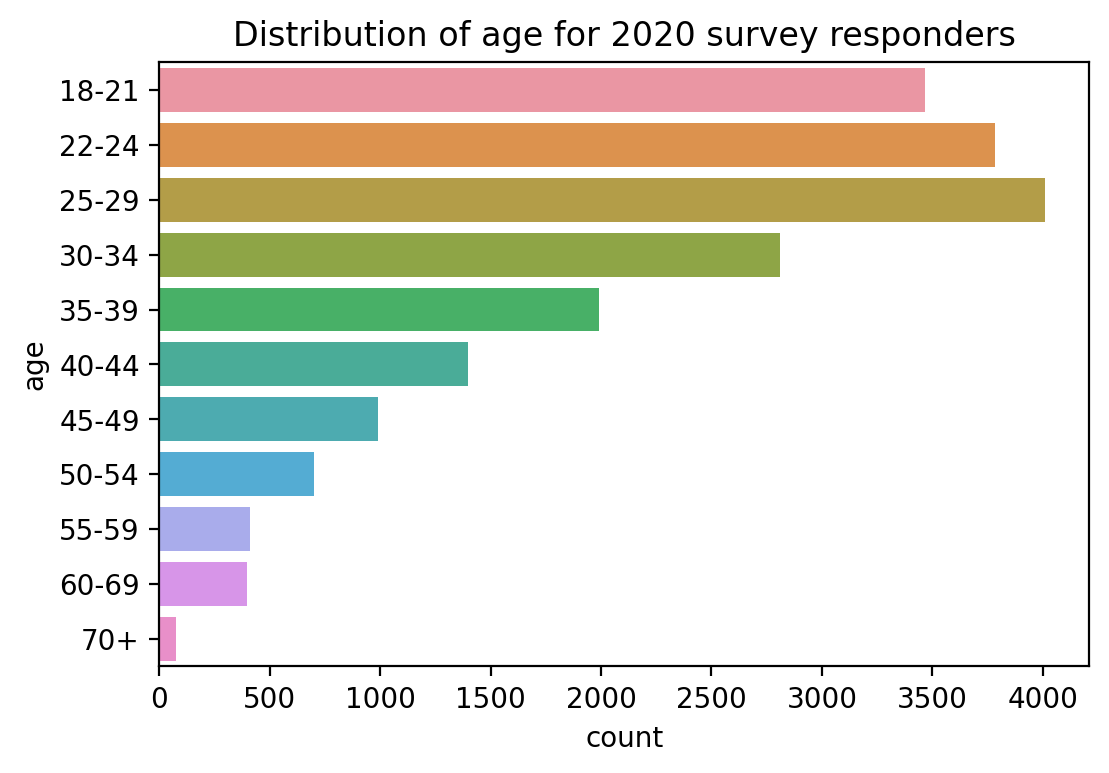

In [11]:
aage_plot = sns.countplot(y='Q1', data=ks_2020, order=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+'])
age_plot.set(ylabel='age')
age_plot.set_title('Distribution of age for 2020 survey responders')
plt.show()

## Sex distribution

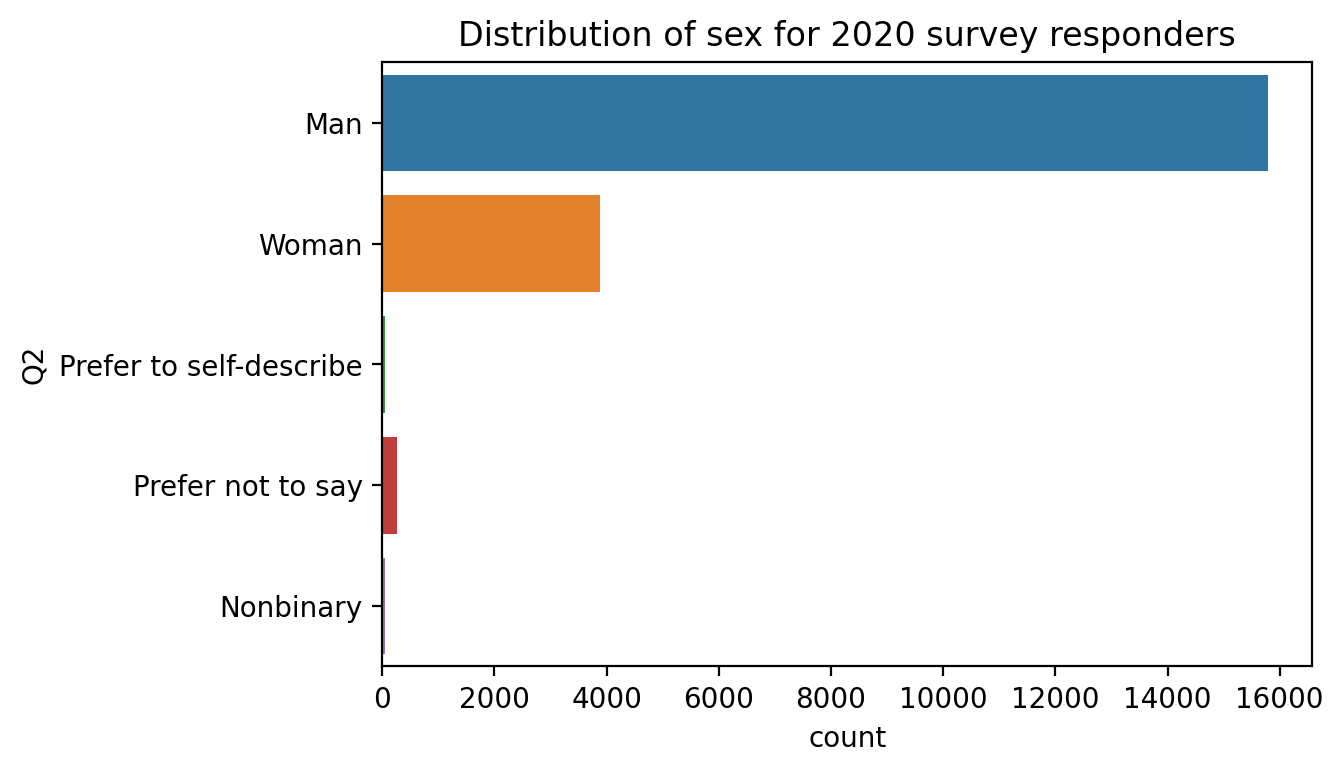

In [13]:
sex_plot = sns.countplot(y='Q2', data=ks_2020)
sex_plot.set_title('Distribution of sex for 2020 survey responders')
plt.show()

Here are the detailed numbers for the above plot.

In [14]:
ks_2020.Q2.value_counts()

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

## Top 20 countries

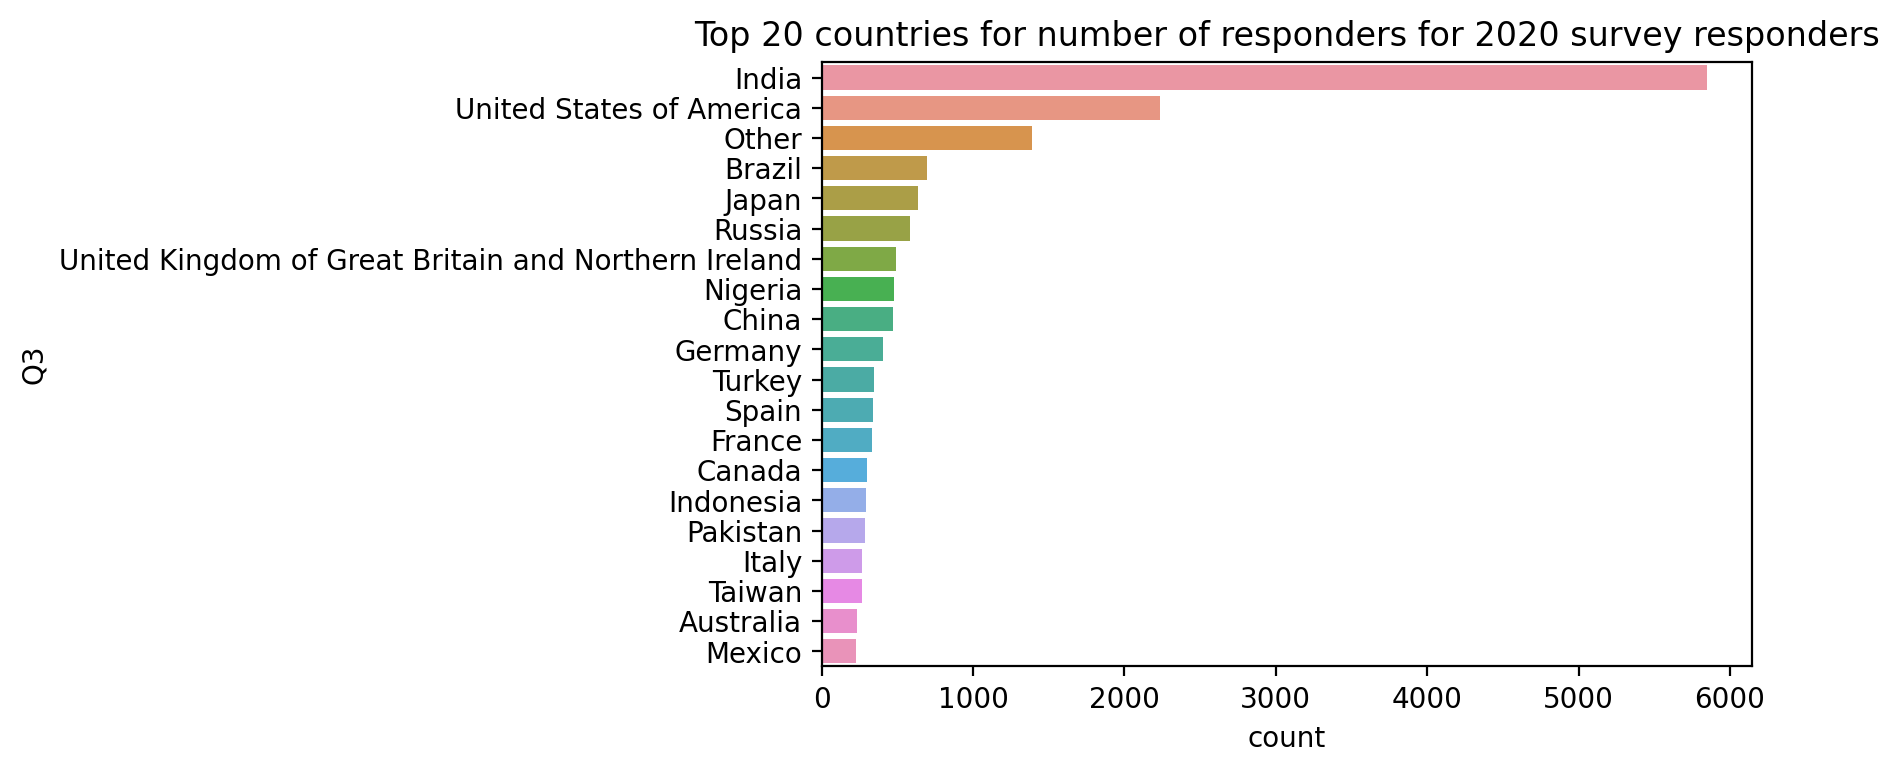

In [15]:
country_plot = sns.countplot(y='Q3', data=ks_2020, order=ks_2020.Q3.value_counts().iloc[:20].index)
country_plot.set_title('Top 20 countries for number of responders for 2020 survey responders')
plt.show()

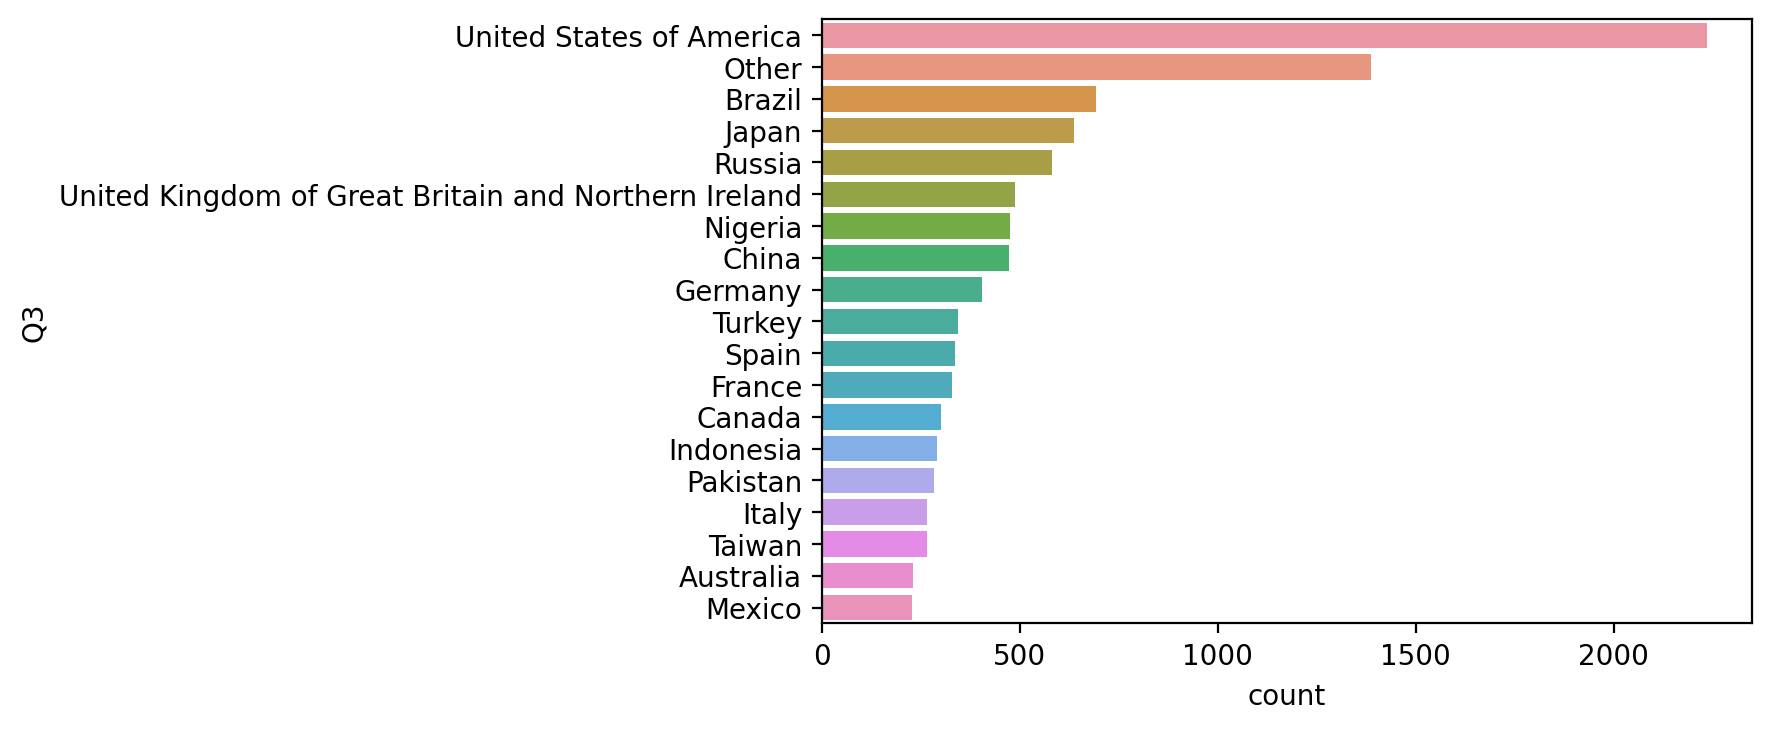

In [ ]:
country_plot2 = sns.countplot(y='Q3', data=ks_2020, order=ks_2020.Q3.value_counts().iloc[1:20].index)

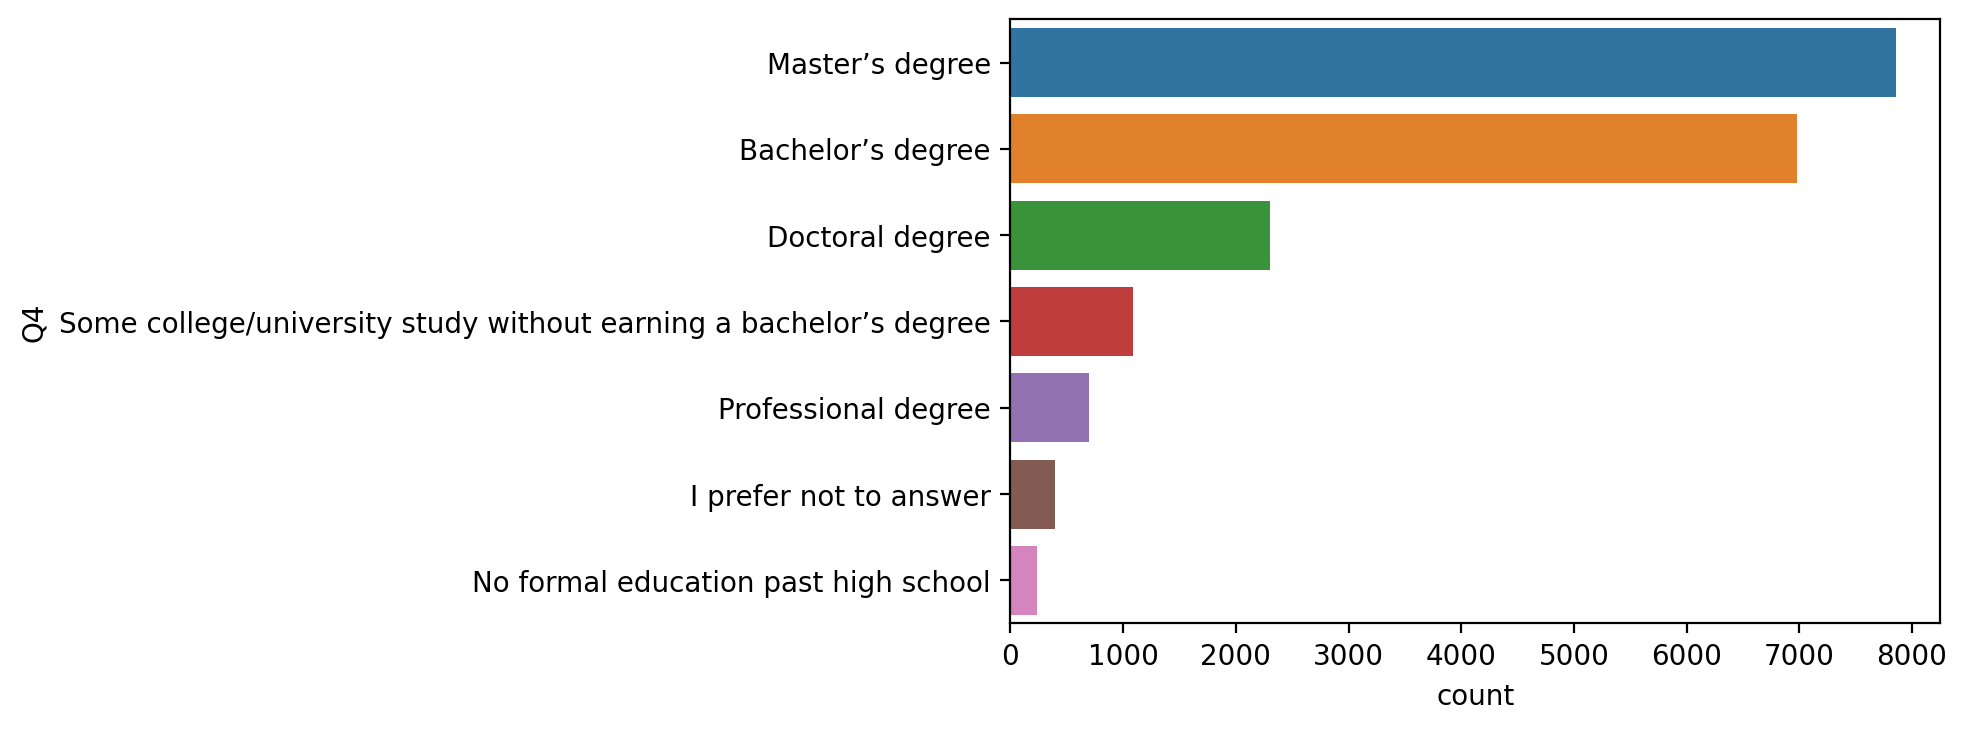

In [ ]:
country_plot = sns.countplot(y='Q4', data=ks_2020, order=ks_2020.Q4.value_counts().index)

In [ ]:
question['Q5']

'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'

Q5: Select the title most similar to your current role (or most recent title if retired): - Selected Choice

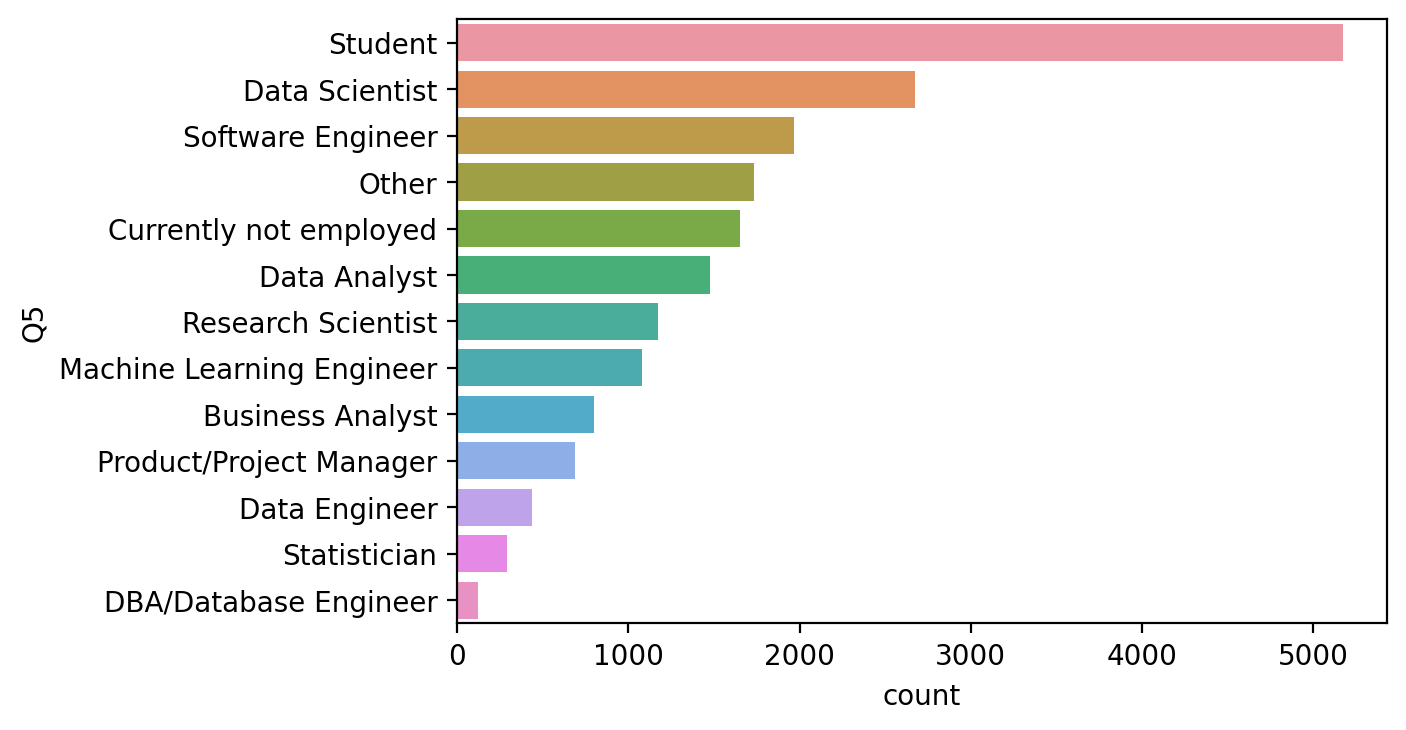

In [ ]:
country_plot = sns.countplot(y='Q5', data=ks_2020, order=ks_2020.Q5.value_counts().index)

# Analysis by Specific Role

Each survey responders identified themselves as one of the following roles in the following question **Q5**.

**Select the title most similar to your current role (or most recent title if retired)**


*   Business Analyst
*   Currently not employed
*   DBA/Database Engineer
*   Data Analyst
*   Data Engineer
*   Data Scientist
*   Machine Learning Engineer
*   Other
*   Product/Project Manager
*   Research Scientist
*   Software Engineer
*   Statistician
*   Student



For each of the subsection in this section, we will analyze specific statistics for each of the roles identified by the responder.

## Q1: Programming Language Analysis

### Percentage of Python Language Users by Each Role
We can see that for all of the roles, more than 50 percent of people in each role were Python users. 

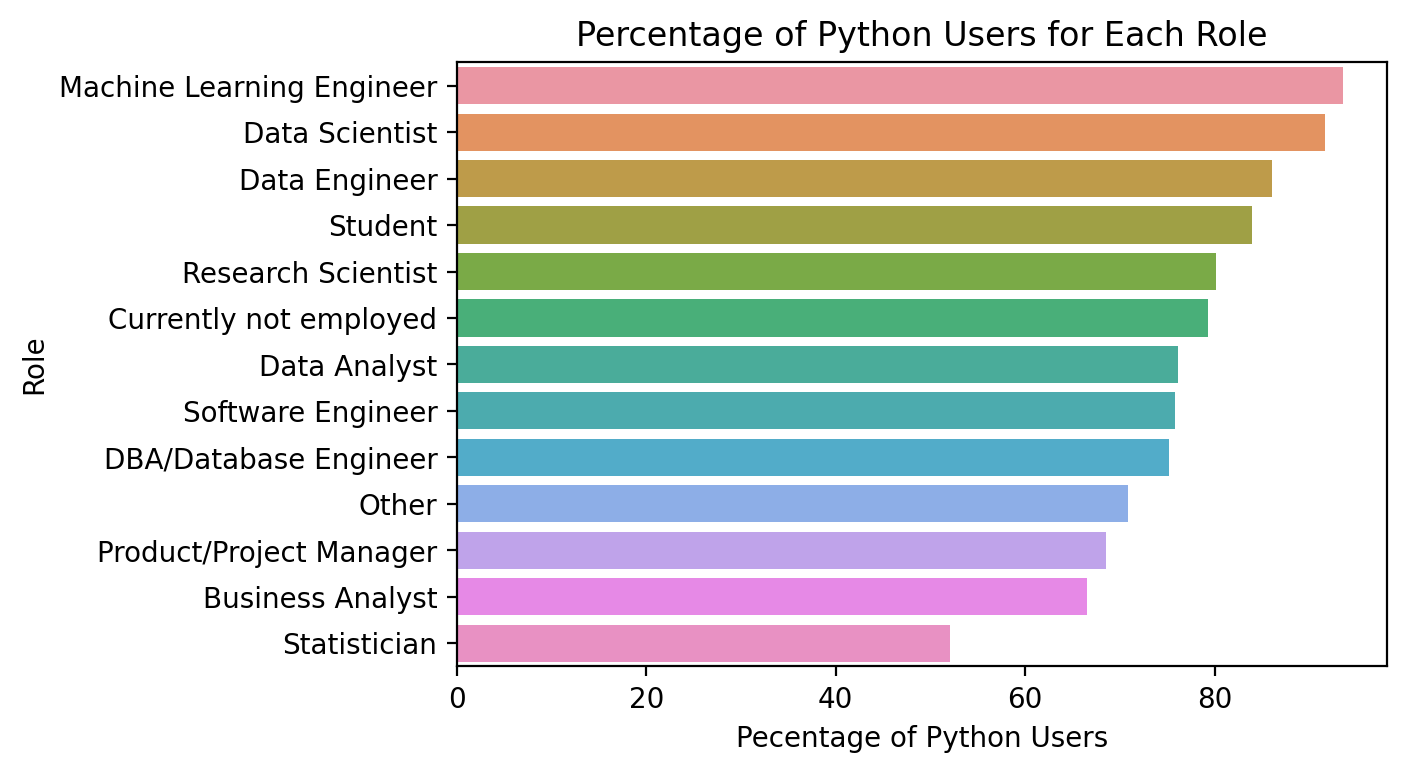

In [ ]:
question_of_interest = 'Q7_Part_1'
value_of_interest = 'Python'
y_axis_prev_name = 'Q5'
y_axis_new_name = 'Role'
x_axis_new_name = 'Pecentage of Python Users'

python_users_plot = (ks_2020[question_of_interest]
 .groupby(ks_2020[y_axis_prev_name])
 .value_counts(normalize=True, dropna=False)
 .multiply(100)
 .xs(value_of_interest, level=1, drop_level=True)
 .rename(x_axis_new_name)
 .reset_index()
 .rename(columns={y_axis_prev_name:y_axis_new_name})
 .sort_values(by=[x_axis_new_name], ascending=False)
 .pipe((sns.barplot, 'data'), x=x_axis_new_name, y=y_axis_new_name, orient='h')
 .set_title('Percentage of Python Users for Each Role'))

### Percentage of R Language Users by Each Role
We can see that only Stasticians use R language extensively, while for other roles, less than 40% of people in each role use R language.

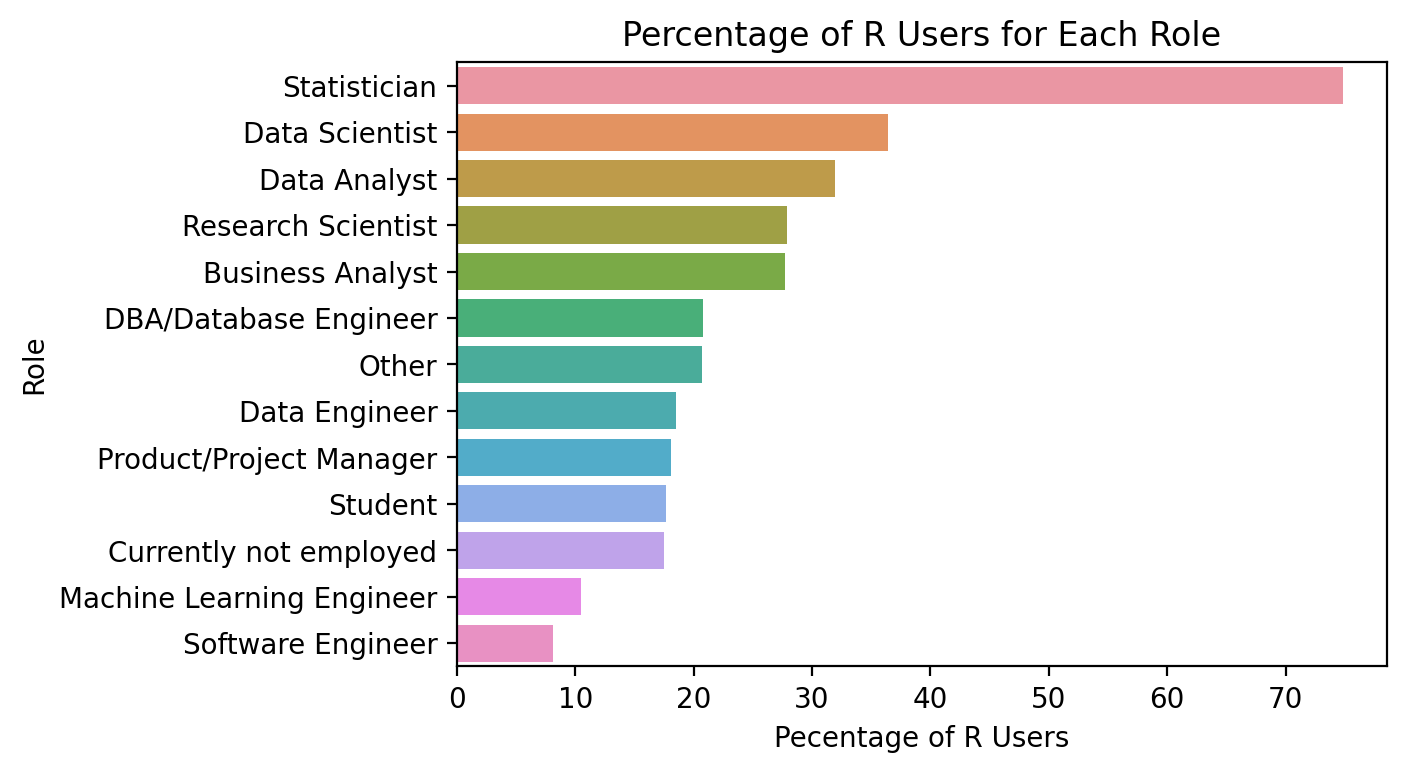

In [ ]:
question_of_interest = 'Q7_Part_2'
value_of_interest = 'R'
y_axis_prev_name = 'Q5'
y_axis_new_name = 'Role'
x_axis_new_name = 'Pecentage of R Users'

python_users_plot = (ks_2020[question_of_interest]
 .groupby(ks_2020[y_axis_prev_name])
 .value_counts(normalize=True, dropna=False)
 .multiply(100)
 .xs(value_of_interest, level=1, drop_level=True)
 .rename(x_axis_new_name)
 .reset_index()
 .rename(columns={y_axis_prev_name:y_axis_new_name})
 .sort_values(by=[x_axis_new_name], ascending=False)
 .pipe((sns.barplot, 'data'), x=x_axis_new_name, y=y_axis_new_name, orient='h')
 .set_title('Percentage of R Users for Each Role'))

### Percentage of SQL Users by Each Role

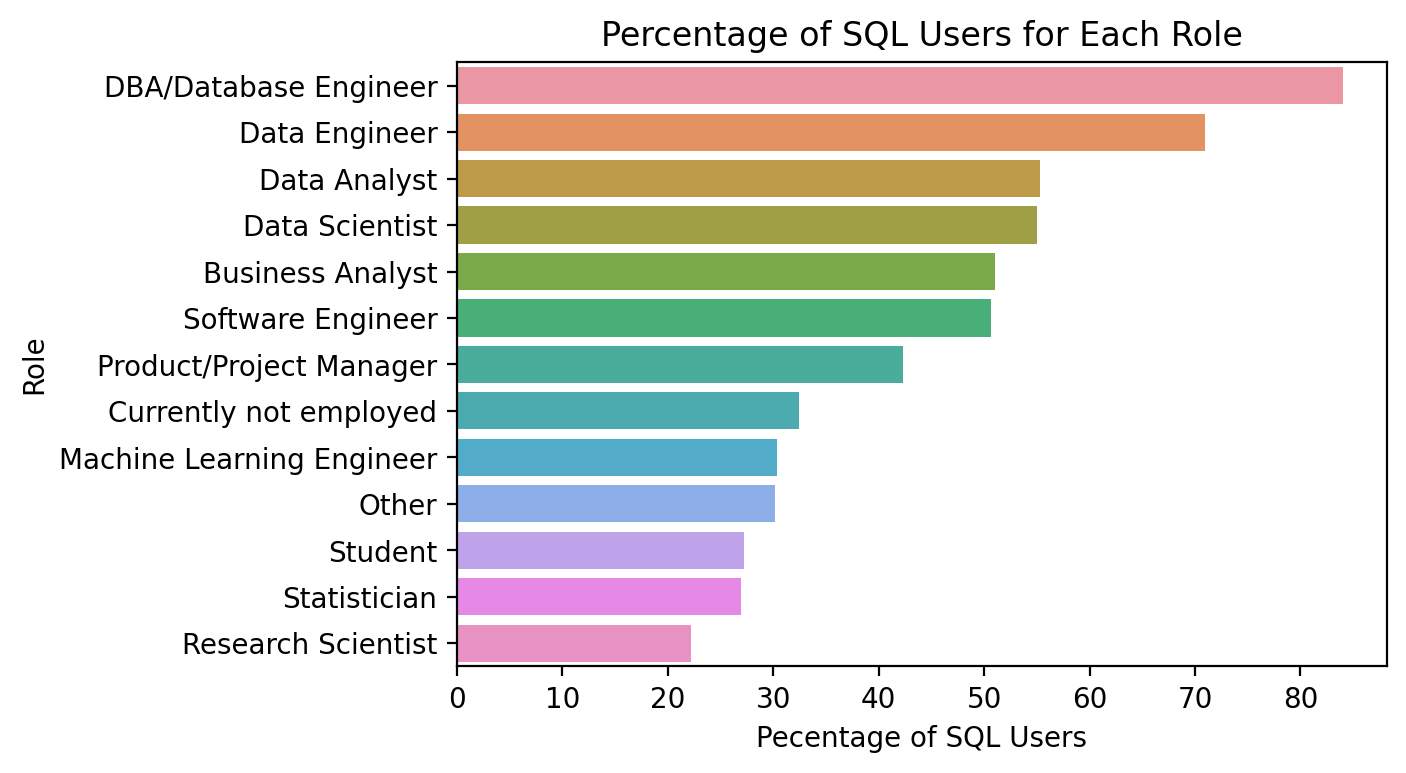

In [ ]:
question_of_interest = 'Q7_Part_3'
value_of_interest = 'SQL'
y_axis_prev_name = 'Q5'
y_axis_new_name = 'Role'
x_axis_new_name = 'Pecentage of SQL Users'

python_users_plot = (ks_2020[question_of_interest]
 .groupby(ks_2020[y_axis_prev_name])
 .value_counts(normalize=True, dropna=False)
 .multiply(100)
 .xs(value_of_interest, level=1, drop_level=True)
 .rename(x_axis_new_name)
 .reset_index()
 .rename(columns={y_axis_prev_name:y_axis_new_name})
 .sort_values(by=[x_axis_new_name], ascending=False)
 .pipe((sns.barplot, 'data'), x=x_axis_new_name, y=y_axis_new_name, orient='h')
 .set_title('Percentage of SQL Users for Each Role'))

## Q2: Machine Learning Framework Analysis

### Percentage of PyTorch Users for Each Role

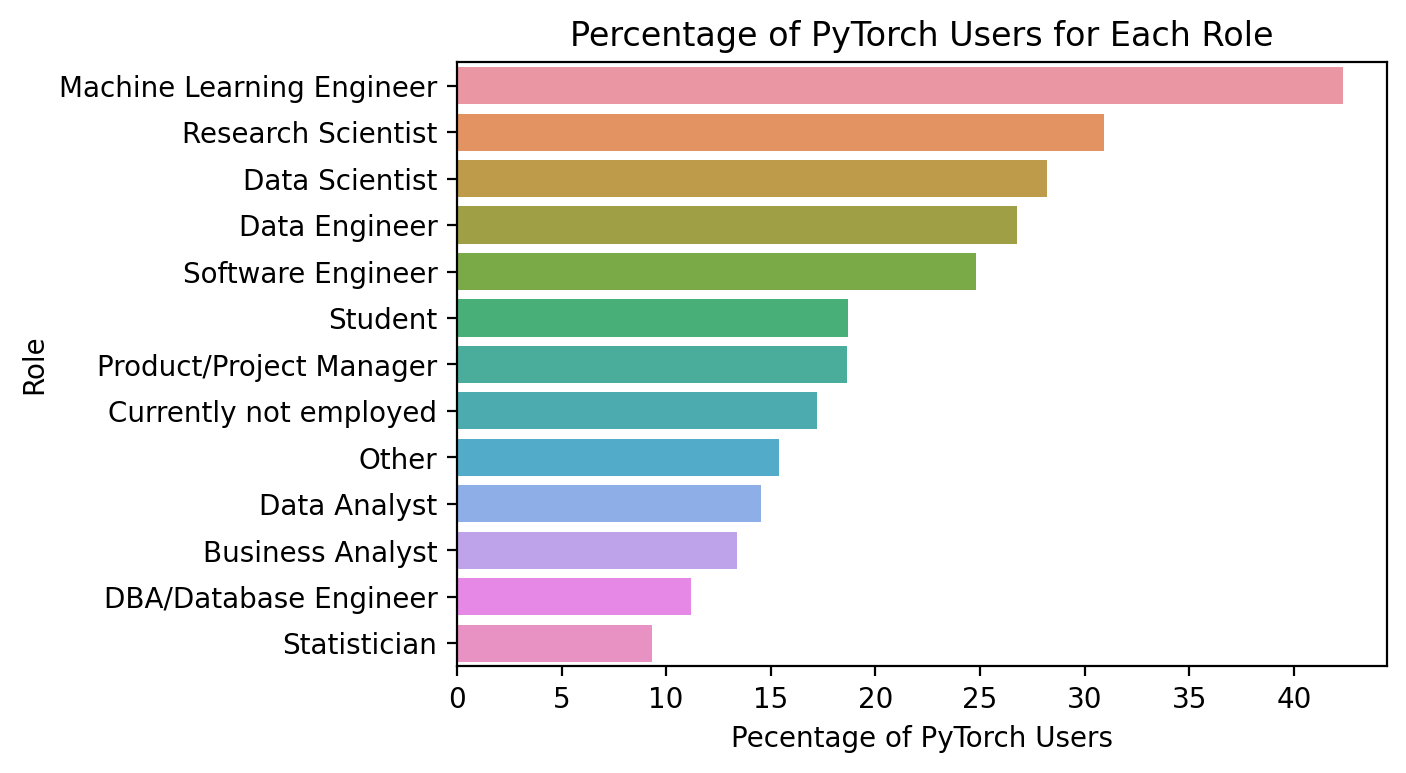

In [ ]:
question_of_interest = 'Q16_Part_4'
value_of_interest = ' PyTorch '
y_axis_prev_name = 'Q5'
y_axis_new_name = 'Role'
x_axis_new_name = 'Pecentage of PyTorch Users'

python_users_plot = (ks_2020[question_of_interest]
 .groupby(ks_2020[y_axis_prev_name])
 .value_counts(normalize=True, dropna=False)
 .multiply(100)
 .xs(value_of_interest, level=1, drop_level=True)
 .rename(x_axis_new_name)
 .reset_index()
 .rename(columns={y_axis_prev_name:y_axis_new_name})
 .sort_values(by=[x_axis_new_name], ascending=False)
 .pipe((sns.barplot, 'data'), x=x_axis_new_name, y=y_axis_new_name, orient='h')
 .set_title('Percentage of PyTorch Users for Each Role'))

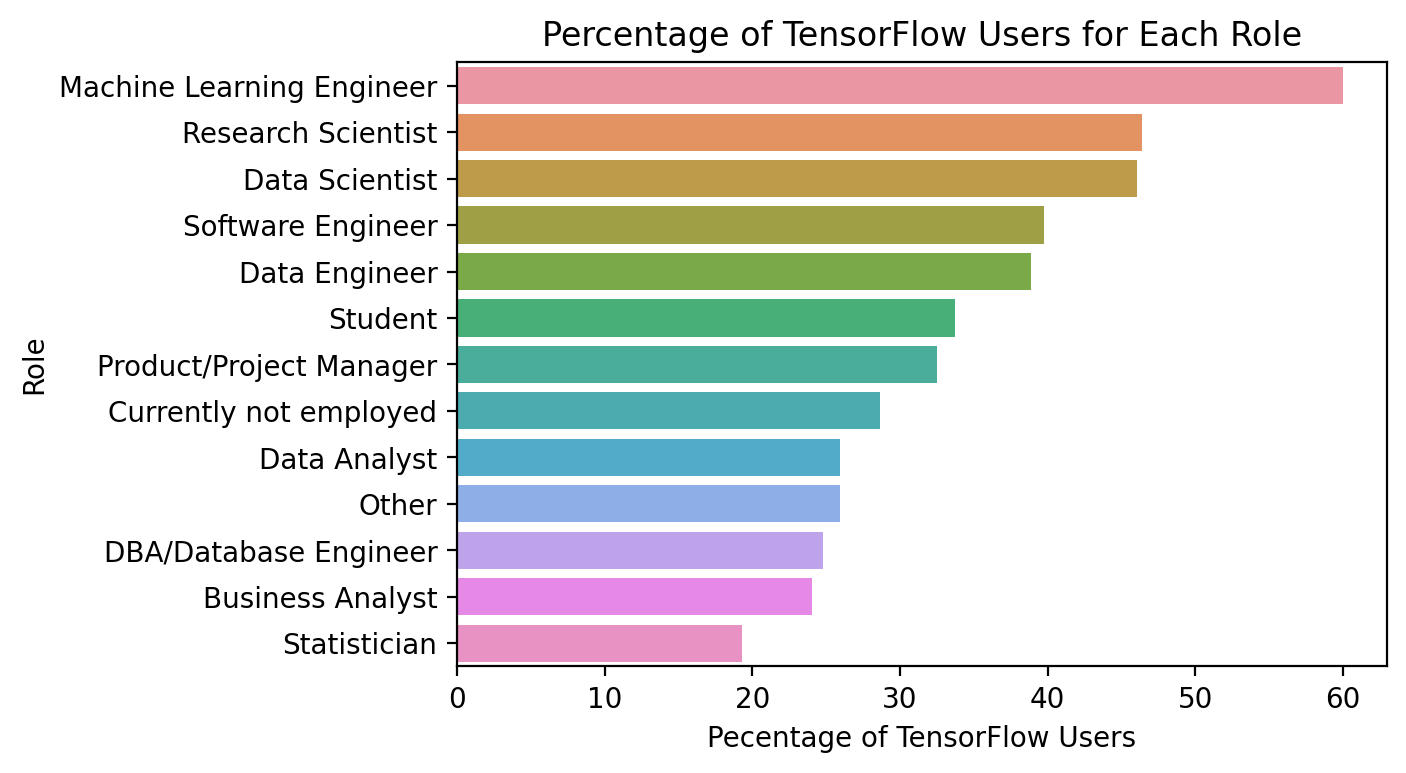

In [ ]:
question_of_interest = 'Q16_Part_2'
value_of_interest = '  TensorFlow '
y_axis_prev_name = 'Q5'
y_axis_new_name = 'Role'
x_axis_new_name = 'Pecentage of TensorFlow Users'

python_users_plot = (ks_2020[question_of_interest]
 .groupby(ks_2020[y_axis_prev_name])
 .value_counts(normalize=True, dropna=False)
 .multiply(100)
 .xs(value_of_interest, level=1, drop_level=True)
 .rename(x_axis_new_name)
 .reset_index()
 .rename(columns={y_axis_prev_name:y_axis_new_name})
 .sort_values(by=[x_axis_new_name], ascending=False)
 .pipe((sns.barplot, 'data'), x=x_axis_new_name, y=y_axis_new_name, orient='h')
 .set_title('Percentage of TensorFlow Users for Each Role'))

## Q3: Income Analysis
I would assume quite a lot of readers are interested in the compensations for each of the roles. Here, I've plotted roles and income by their counts.


In [48]:
income_order = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999',  '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', 
                '100,000-124,999', '125,000-149,999', '150,000-199,999', 
                '200,000-249,999', '250,000-299,999', 
                '300,000-500,000', '> $500,000']

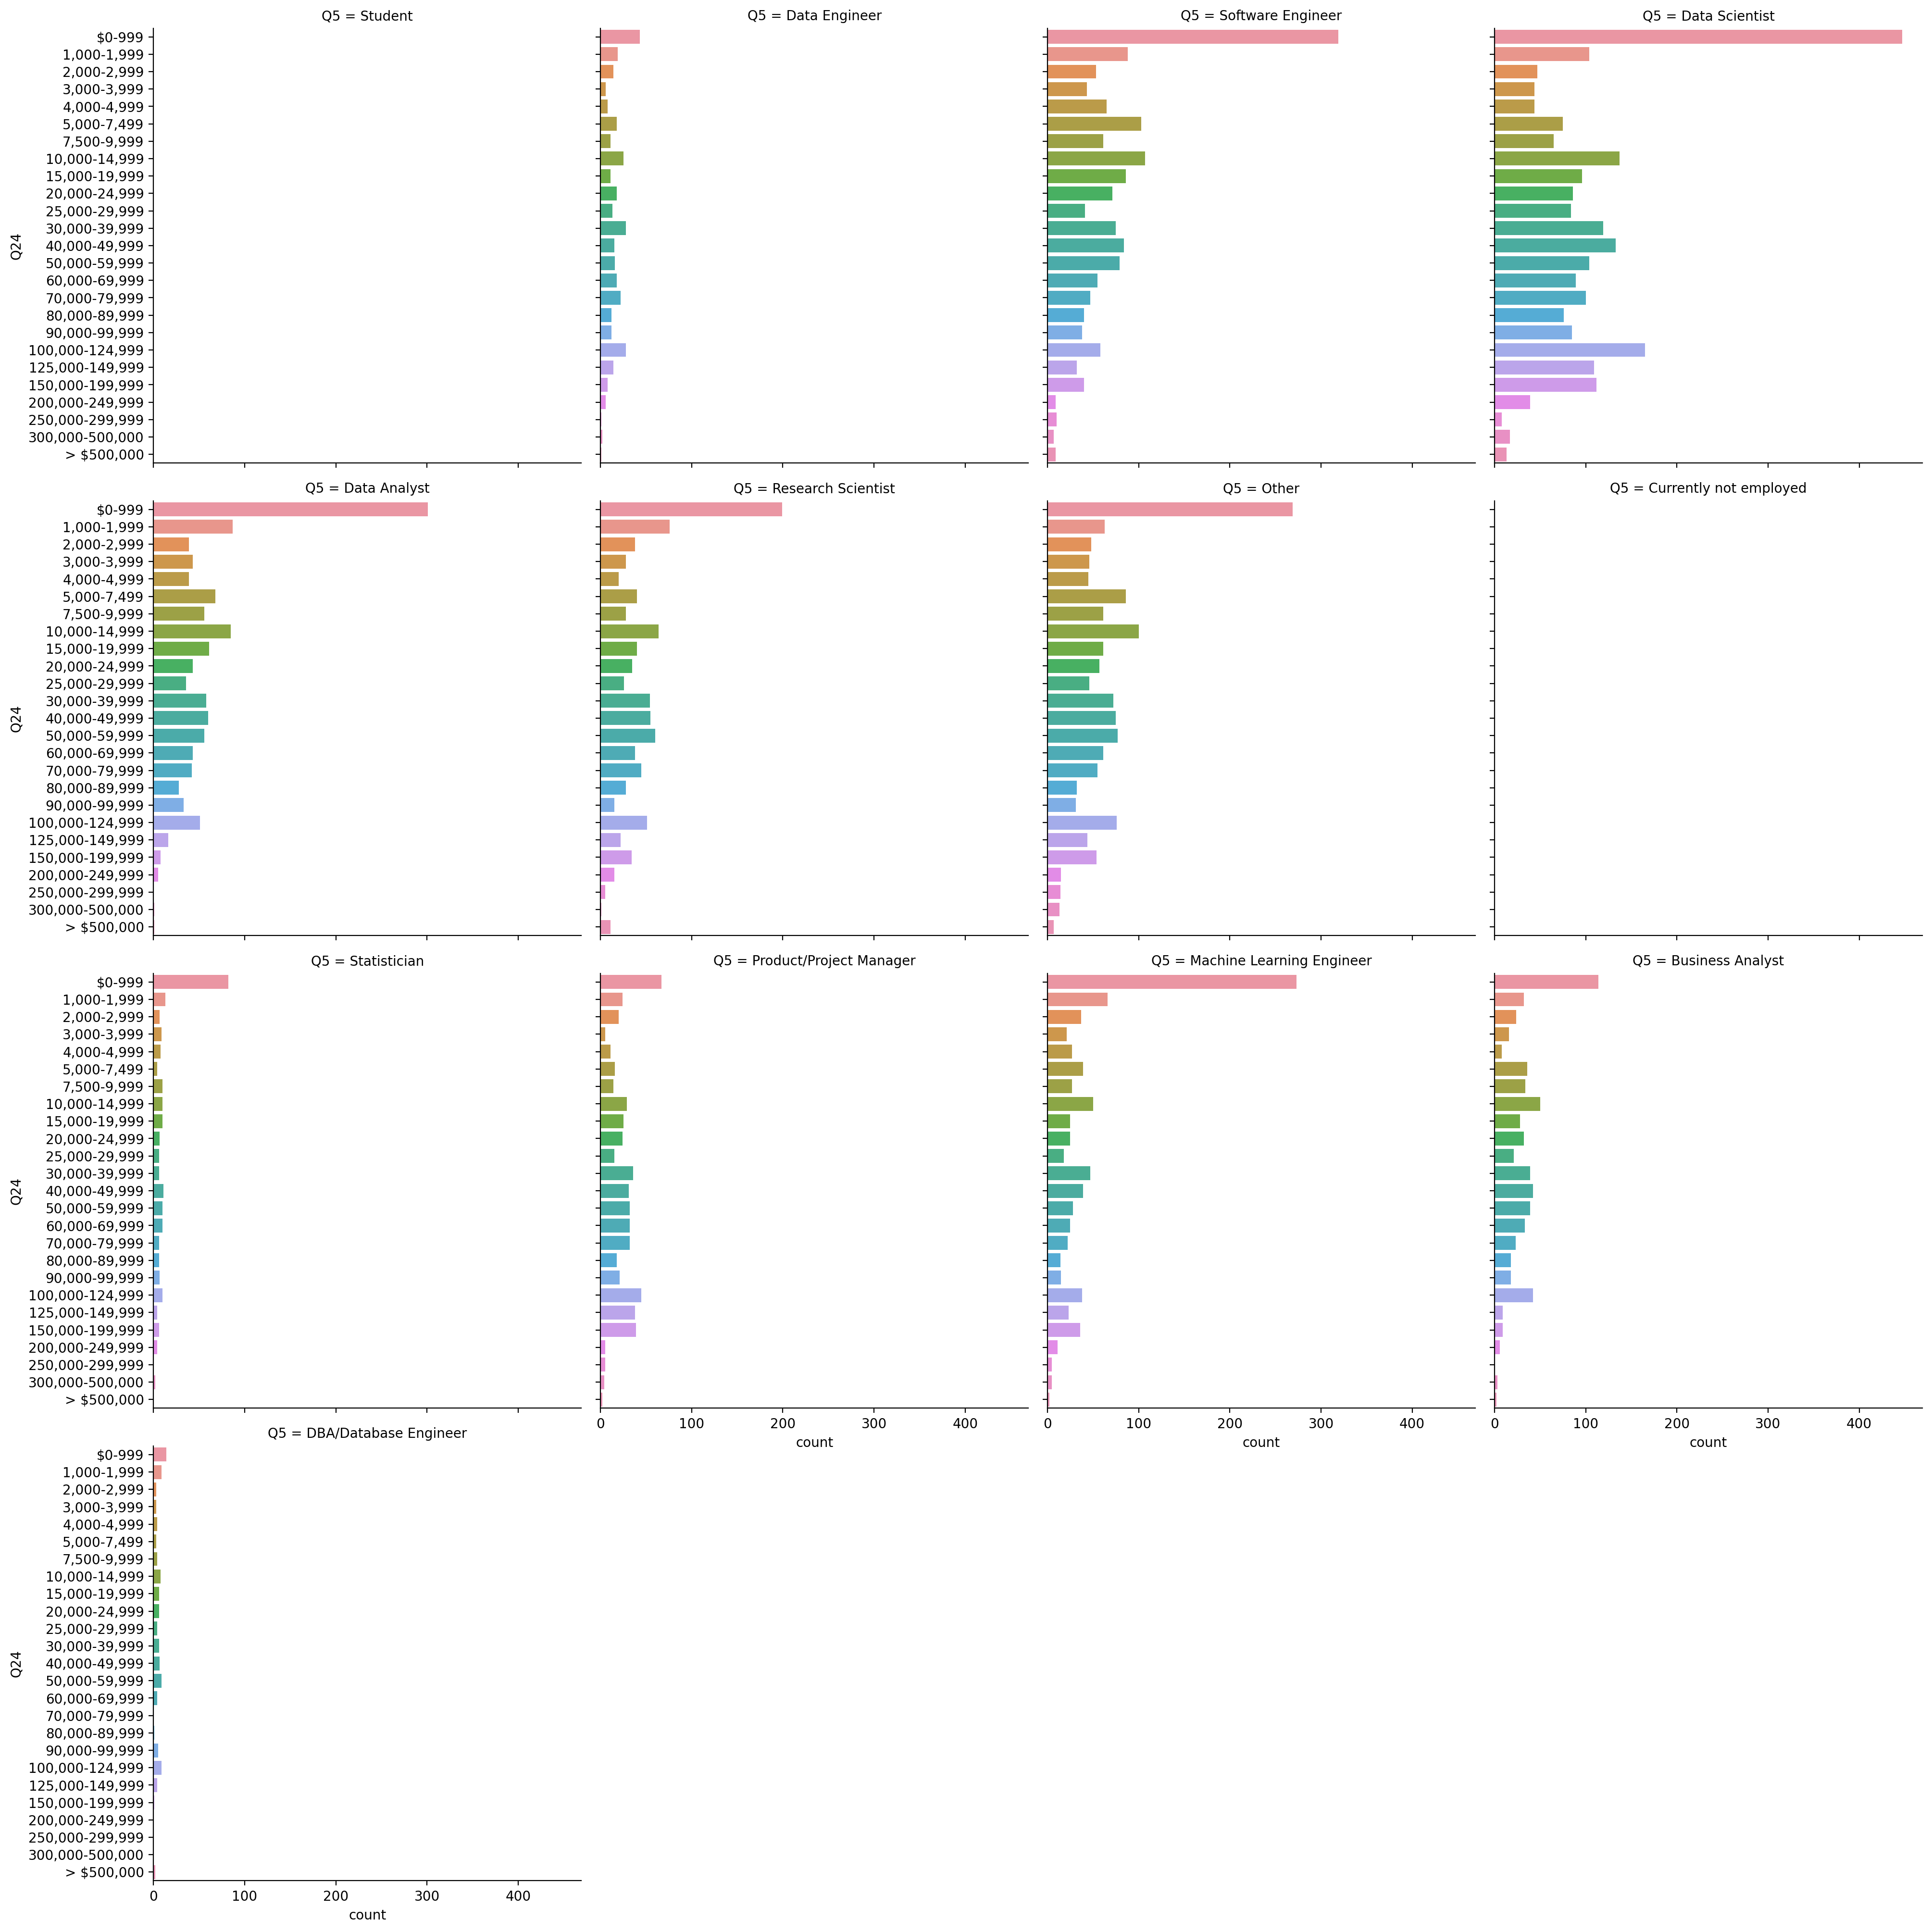

In [124]:
#sns.countplot(x='Q24', hue='Q5', data=ks_2020, order=income_order)
sns.catplot(y='Q24', data=ks_2020, col='Q5', kind='count', order=income_order, col_wrap=4)